# Sistemas de inferencia difusos

El **sistema de inferencia difusa** es un marco de computación popular basado en los conceptos de teoría de conjuntos difusos, reglas difusas de tipo *if-then* y razonamiento difuso. Ha encontrado aplicaciones exitosas en una amplia variedad de campos, como el control automático, clasificación de datos, análisis de decisiones, sistemas expertos, predicción de series de tiempo, robótica y reconocimiento de patrones. Debido a su naturaleza multidisciplinaria, el sistema de inferencia difusa es conocido por muchos otros nombres, como **sistema basado en reglas difusas**, **modelo difuso** o, simple y ambiguamente, **sistema difuso**.

La estructura básica de un sistema de inferencia difusa consta de tres componentes conceptuales:

1. **Base de reglas**, que contiene una selección de reglas difusas;
2. **Base de datos** (o diccionario), que define las funciones de membresía utilizadas en las reglas difusas;
3. **Mecanismo de razonamiento**, que realiza el procedimiento de inferencia sobre las reglas y los hechos dados para derivar una salida razonable o una conclusión.

Nótese que la estructura básica del sistema de inferencia difusa puede tomar entradas difusas o valores certeros (que se consideran como *singletons* difusos), pero las salidas que produce son casi siempre conjuntos difusos. Algunas veces es necesario tener una salida certera, especialmente en situaciones donde un sistema de inferencia difusa se utiliza como controlador. Por lo tanto, se necesita un método de **desdifusificación** para extraer un valor certero que represente mejor un conjunto difuso.

Con entradas y salidas certeras o difusas, un sistema de inferencia difusa implementa un mapeo no lineal desde su espacio de entrada al espacio de salida. Este mapeo se logra mediante un número de reglas *if-then* difusas, cada una de las cuales describe el comportamiento local del mapeo. En particular, el antecedente de una regla define una región difusa en el espacio de entrada, mientras que el consecuente especifica la salida en la región difusa.

## Modelos Difusos de Mamdani

El **sistema de inferencia difusa de Mamdani** fue propuesto como el primer intento de controlar una combinación de máquina de vapor y caldera mediante un conjunto de reglas de control lingüísticas obtenidas de operadores humanos experimentados.

Si adoptamos el producto algebraico como nuestra elección para los operadores norma triangular y composición original *max-min*, entonces la salida inferida de cada regla es un conjunto difuso escalado por su intensidad de disparo mediante el producto algebraico. Aunque este tipo de razonamiento difuso no fue empleado en el documento original de Mamdani, ha sido usado en la literatura. Variaciones son posibles si usamos diferentes operadores norma triangular y conorma triangular.

En la aplicación de Mamdani, dos sistemas de inferencia difusa fueron usados como controladores para generar el calor de entrada a la caldera y la apertura del acelerador del cilindro, respectivamente, para regular la presión de vapor en la caldera y la velocidad de la máquina. Dado que la planta solo toma valores certeros como entradas, debemos usar un desdifusificador para convertir un conjunto difuso en un valor certero.

### Desdifusificación

La desdifusificación se refiere a la forma en que se extrae un valor certero de un conjunto difuso como un valor representativo. En general, hay cinco métodos para desdifusificar un conjunto difuso $A$ de un universo de discurso $Z$. A continuación, se proporciona una breve explicación de cada estrategia de desdifusificación:

1. **Centroide del área $z_{COA}$:**

$$
z_{COA} = \frac{\int_Z \mu_A(z) z \, dz}{\int_Z \mu_A(z) \, dz},
$$

donde $\mu_A(z)$ es la función de membresía de salida agregada. Esta es la estrategia de desdifusificación más utilizada, que recuerda el cálculo de los valores esperados de distribuciones de probabilidad.


2. **Bisector del área $z_{BOA}$:**

$$
\int_\alpha^{z_{BOA}} \mu_A(z) \, dz = \int_{z_{BOA}}^\beta \mu_A(z) \, dz,
$$

donde $\alpha = \min\{z | z \in Z\}$ y $\beta = \max\{z | z \in Z\}$. Es decir, la línea vertical $z = z_{BOA}$ divide la región entre $z = \alpha$, $z = \beta$, $y = 0$, y $y = \mu_A(z)$ en dos regiones con la misma área.

3. **Media del máximo \( z_{MOM} \):**

$z_{MOM}$ es el promedio de los valores que maximizan $z$ en los cuales la función de membresía alcanza un máximo $\mu^*$. En símbolos:

$$
z_{MOM} = \frac{\int_{Z'} z \, dz}{\int_{Z'} dz},
$$

donde $Z' = \{z | \mu_A(z) = \mu^*\}$. En particular, si $\mu_A(z)$ tiene un único máximo en $z = z^*$, entonces $z_{MOM} = z^*$.
Además, si $\mu_A(z)$ alcanza su máximo entre $z = [z_{\text{left}}, z_{\text{right}}]$, entonces $z_{MOM} = (z_{\text{left}} + z_{\text{right}})/2$. El promedio del máximo es la estrategia de desdifusificación empleada en los controladores lógicos difusos de Mamdani.

4. **Menor del máximo \( z_{SOM} \)**:

$z_{SOM}$ es el mínimo (en términos de magnitud) de los valores $z$ que maximizan $\mu_A(z)$.

5. **Mayor del máximo $z_{LOM}$**:

$z_{LOM}$ es el máximo (en términos de magnitud) de los valores $z$ que maximizan $\mu_A(z)$. Debido a su evidente sesgo, $z_{SOM}$ y $z_{LOM}$ no se utilizan con tanta frecuencia como los otros tres métodos de desdifusificación.

El cálculo necesario para llevar a cabo cualquiera de estas cinco operaciones de desdifusificación consumirá tiempo a menos que se disponga de soporte especial de hardware. Además, estas operaciones de desdifusificación no son fácilmente sujetas a un análisis matemático riguroso, por lo que la mayoría de los estudios se basan en resultados experimentales. Esto lleva a la propuesta de otros tipos de sistemas de inferencia difusa que no requieren desdifusificación en absoluto; dos de ellos se introducen en la siguiente sección. Cabe mencionar que existen métodos de desdifusificación más flexibles, pero estos no se abordarán en este capítulo.

#### Otras variantes

En consideración a la **eficiencia computacional** o **tractabilidad matemática**, un sistema de inferencia difusa en la práctica puede tener un mecanismo de razonamiento que no siga estrictamente la definición de la regla de inferencia composicional; por ejemplo, se puede usar el producto para calcular las intensidades de disparo (para reglas con antecedentes **AND**), mínimo para calificar las funciones de membresía consecuentes y máximo para agregarlas en una función de membresía de salida general. Por lo tanto, para especificar completamente la operación de un sistema de inferencia difusa de Mamdani, necesitamos asignar una función para cada uno de los siguientes operadores:

- **Operador AND** (generalmente norma T): Para calcular la intensidad de disparo de una regla con antecedentes AND.

- **Operador OR** (generalmente conorma T): Para calcular la intensidad de disparo de una regla con antecedentes OR.

- **Operador de implicación** (generalmente norma T): Para calcular funciones de membresía consecuentes basadas en una intensidad de disparo dada.

- **Operador de agregación** (generalmente conorma T): Para agregar funciones de membresía consecuentes calificadas y generar una función de membresía de salida.

- **Operador de desdifusificación**: Para transformar una función de membresía de salida en un valor certero único.

Un ejemplo de esto es usar el **producto** para el operador de implicación y la **suma puntual** para el operador de adición (Nótese que la **suma** ni siquiera es un operador conorma T). Una ventaja de esta **composición suma-producto** es que la salida certerafinal usando **desdifusificación por centroide** es igual al **promedio ponderado** de los centroides de las funciones de membresía consecuentes, donde el factor de ponderación para cada regla es igual a su intensidad de disparo multiplicada por el área de la función de membresía consecuente. Esto se expresa en el siguiente teorema.

**Teorema: Atajo computacional para sistemas de inferencia difusa de Mamdani**

Bajo composición suma-producto, la salida de un sistema de inferencia difusa de Mamdani con desdifusificación por centroide es igual al **promedio ponderado de los centroides** de las funciones de membresía consecuentes, donde cada uno de los factores de ponderación es igual al producto de la intensidad de disparo y el área de la función de membresía consecuente.

**Demostración**

Demostraremos este teorema para un sistema de inferencia difusa con dos reglas. Usando producto y suma para los operadores de implicación y agregación, respectivamente, tenemos:

$$
\mu_C(z) = w_1 \mu_{C_1}(z) + w_2 \mu_{C_2}(z).
$$

Nótese que la función de membresía resultante podría tener valores mayores que 1 en ciertos puntos. La salida certera usando desdifusificación por centroide es:

$$
z_{COA} = \frac{\int_Z \mu_C(z) z \, dz}{\int_Z \mu_C(z) \, dz}.
$$

Sustituyendo la expresión de $\mu_C(z)$, obtenemos:

$$
z_{COA} = \frac{w_1 \int_Z \mu_{C_1}(z) z \, dz + w_2 \int_Z \mu_{C_2}(z) z \, dz}{w_1 \int_Z \mu_{C_1}(z) \, dz + w_2 \int_Z \mu_{C_2}(z) \, dz}.
$$

Por definición, el área y el centroide de la función de membresía $\mu_{C_i}(z)$ son:

$$
a_i = \int_Z \mu_{C_i}(z) \, dz, \quad z_i = \frac{\int_Z \mu_{C_i}(z) z \, dz}{\int_Z \mu_{C_i}(z) \, dz}.
$$

Por lo tanto, la salida se puede simplificar como:

$$
z_{COA} = \frac{w_1 a_1 z_1 + w_2 a_2 z_2}{w_1 a_1 + w_2 a_2}.
$$

**Conclusión**

Utilizando este teorema, el cómputo es más eficiente si se pueden obtener el área y el centroide de cada función de membresía consecuente por adelantado.

## Modelos Difusos de Sugeno

El modelo difuso de Sugeno (también conocido como el modelo difuso TSK) fue propuesto por Takagi, Sugeno y Kang en un esfuerzo por desarrollar un enfoque sistemático para generar reglas difusas a partir de un conjunto de datos de entrada-salida dado. Una regla difusa típica en un modelo difuso de Sugeno tiene la forma:

$$
\text{ si } x \text{ es } A \text{ y } y \text{ es } B \text{ entonces } z = f(x, y),
$$

donde $A$ y $B$ son conjuntos difusos en el antecedente, mientras que $z = f(x, y)$ es una función certera en el consecuente. Usualmente, $f(x, y)$ es un polinomio en las variables de entrada $x$ y $y$, pero puede ser cualquier función siempre que pueda describir adecuadamente la salida del modelo dentro de la región difusa especificada por el antecedente de la regla. Cuando $f(x, y)$ es un polinomio de primer orden, el sistema de inferencia difusa resultante se llama **modelo difuso de Sugeno de primer orden**. Cuando $f$ es una constante, entonces tenemos un **modelo difuso de Sugeno de orden cero**, que puede verse ya sea como un caso especial del sistema de inferencia difusa de Mamdani (en el que el consecuente de cada regla está especificado por un único valor difuso), o como un caso especial del modelo difuso de Tsukamoto (que será introducido más adelante), en el que el consecuente de cada regla está especificado por una función de membresía de una sola función de tipo punto centrada en la constante. Además, un modelo difuso de Sugeno de orden cero es funcionalmente equivalente a una red neuronal de funciones de base radial bajo ciertas restricciones menores.

La salida de un modelo difuso de Sugeno de orden cero es una función suave de sus variables de entrada siempre que las funciones de membresía en el antecedente tengan suficiente solapamiento. En otras palabras, el solapamiento de las funciones de membresía en el consecuente de un modelo de Mamdani no tiene un efecto decisivo en la suavidad; es el solapamiento de las funciones de membresía del antecedente lo que determina la suavidad del comportamiento de entrada-salida resultante.

$$
z_1 = p_1 x + q_1 y + r_1
$$

$$
z_2 = p_2 x + q_2 y + r_2
$$

Resultado tras aplicar el **promedio ponderado**:

$$
z = \frac{w_1 z_1 + w_2 z_2}{w_1 + w_2}
$$


Aquí se muestra el procedimiento de razonamiento difuso para un modelo difuso de Sugeno de primer orden. Dado que cada regla tiene una salida certera, la salida global se obtiene mediante un promedio ponderado, evitando así el proceso que consume tiempo de la desdifusificación requerida en un modelo de Mamdani. En la práctica, el operador de promedio ponderado es reemplazado con el operador de suma ponderada (es decir, $z = w_1 z_1 + w_2 z_2 + \ldots$) para reducir aún más el tiempo de cálculo, especialmente en el entrenamiento de un sistema de inferencia difusa. Sin embargo, esta simplificación podría llevar a la pérdida de significados lingüísticos de las funciones de membresía a menos que la suma de las intensidades de disparo (es decir, $\Sigma w_i$) esté cerca de la unidad.

Dado que el único conjunto difuso de un modelo de Sugeno está en su antecedente, es fácil demostrar la distinción entre un conjunto de reglas difusas y no difusas.

#### Comparación entre conjunto de reglas difusas y no difusas

Un ejemplo de un modelo difuso de Sugeno de una sola entrada se puede expresar como:

- **Si $X$ es pequeño, entonces $Y = 0.1X + 6.4$.**
- **Si $X$ es mediano, entonces $Y = -0.5X + 4$.**
- **Si $X$ es grande, entonces $Y = X - 2$.**

Si "pequeño", "mediano" y "grande" son conjuntos no difusos, entonces la curva de entrada-salida general es lineal por partes, como se muestra a continuación:

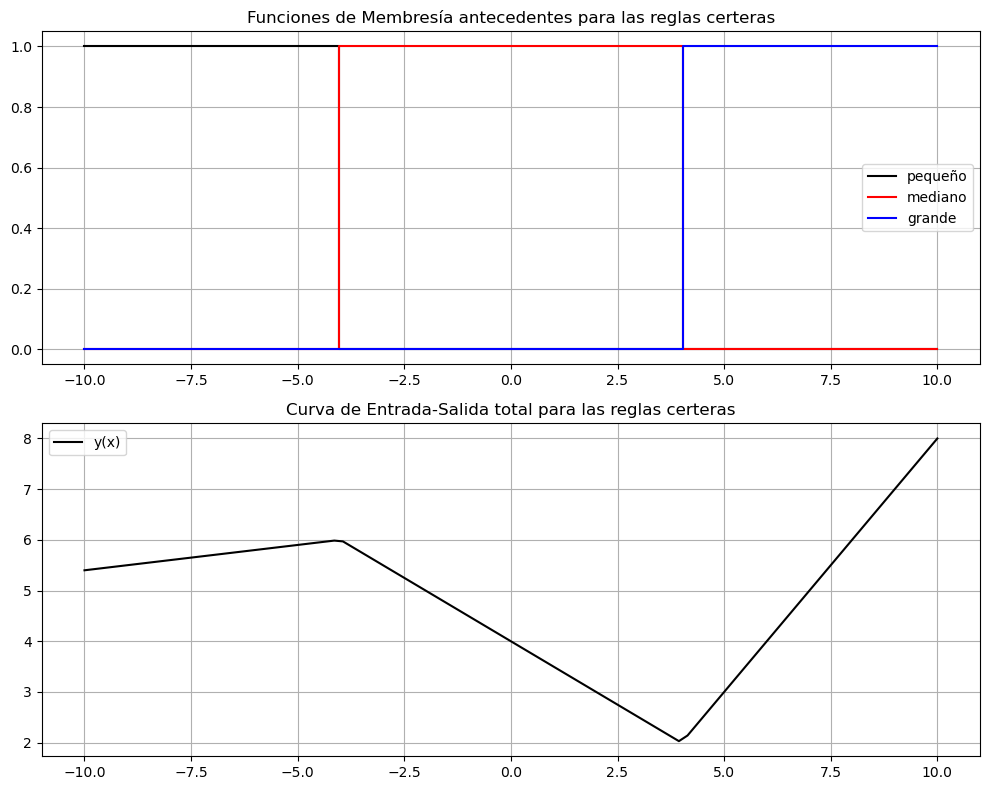

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de x
x = np.linspace(-10, 10, 100)

# Definir funciones de membresía certeras (discretas)
uA1 = np.where(x < -4, 1, 0)                # "pequeño" para x < -5
uA2 = np.where((x >= -4) & (x <= 4), 1, 0)  # "mediano" para -5 <= x <= 5
uA3 = np.where(x > 4, 1, 0)                 # "grande" para x > 5

# Funciones lineales asociadas
f1 = 0.1 * x + 6.4  # Para "pequeño"
f2 = -0.5 * x + 4   # Para "mediano"
f3 = x - 2          # Para "grande"

# Calcular la salida y(x) como combinación ponderada
numerador = uA1 * f1 + uA2 * f2 + uA3 * f3
denominador = uA1 + uA2 + uA3
y = np.divide(numerador, denominador, out=np.zeros_like(numerador), where=denominador != 0)

# Graficar los resultados
plt.figure(figsize=(10, 8))

# Subplot 1: Funciones de membresía certeras
plt.subplot(2, 1, 1)
plt.step(x, uA1, 'k', label='pequeño', where='mid')
plt.step(x, uA2, 'r', label='mediano', where='mid')
plt.step(x, uA3, 'b', label='grande', where='mid')
plt.grid()
plt.legend()
plt.title('Funciones de Membresía antecedentes para las reglas certeras')

# Subplot 2: Salida y(x)
plt.subplot(2, 1, 2)
plt.plot(x, y, 'k', label='y(x)')
plt.grid()
plt.legend()
plt.title('Curva de Entrada-Salida total para las reglas certeras')

plt.tight_layout()
plt.show()


Por otro lado, si tenemos funciones de membresía suaves en su lugar, la curva de entrada-salida general se convierte en una más suave, como se observa en el siguiente ejemplo:

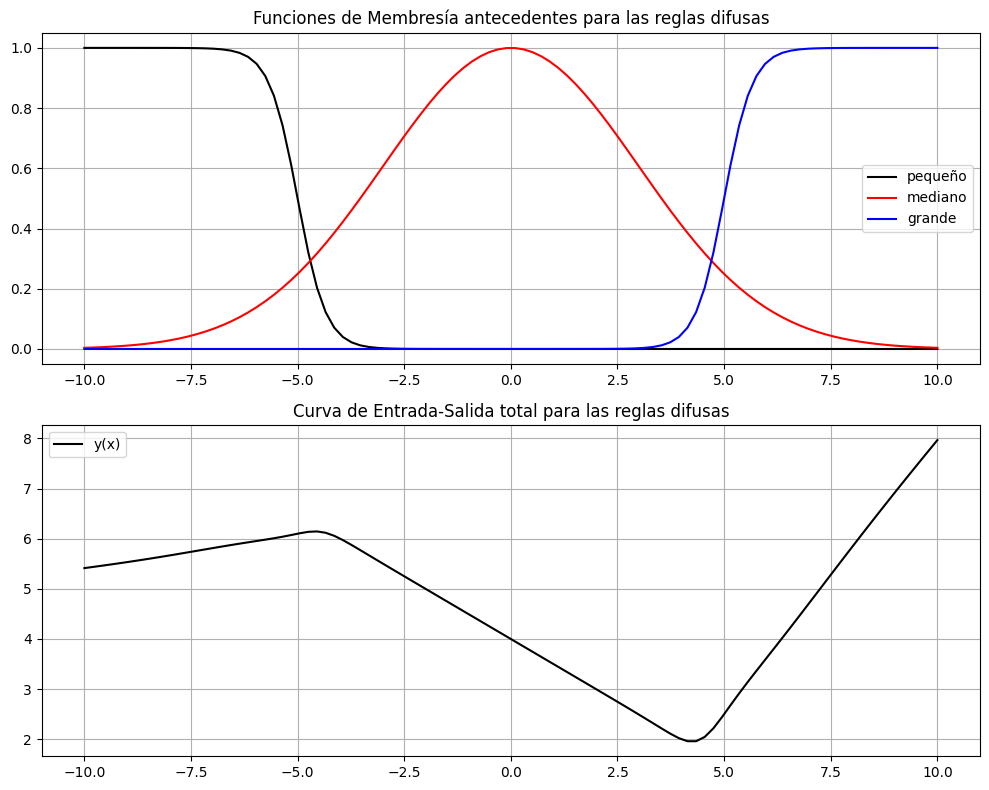

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de x
x = np.linspace(-10, 10, 100)

# Parámetros para las funciones de membresía
medioA1, sigmaA1 = -5, 3
medioA2, sigmaA2 = 0, 3
medioA3, sigmaA3 = 5, 3

# Inicializar listas para los valores calculados
uA1 = []
uA2 = []
uA3 = []
y = []

# Cálculos
for r in range(len(x)):
    # Funciones de membresía
    uA1.append(1 / (1 + np.exp(sigmaA1 * (x[r] - medioA1))))
    uA2.append(np.exp(-0.5 * ((x[r] - medioA2) / sigmaA2)**2))
    uA3.append(1 / (1 + np.exp(-sigmaA3 * (x[r] - medioA3))))
    
    # Funciones lineales
    f1 = 0.1 * x[r] + 6.4
    f2 = -0.5 * x[r] + 4
    f3 = x[r] - 2
    
    # Valores ponderados
    t1 = uA1[r] * f1
    t2 = uA2[r] * f2
    t3 = uA3[r] * f3
    
    # Calcular el valor de salida
    y.append((t1 + t2 + t3) / (uA1[r] + uA2[r] + uA3[r]))

# Convertir listas a arrays para graficar
uA1 = np.array(uA1)
uA2 = np.array(uA2)
uA3 = np.array(uA3)
y = np.array(y)

# Graficar los resultados
plt.figure(figsize=(10, 8))

# Subplot 1: Funciones de membresía
plt.subplot(2, 1, 1)
plt.plot(x, uA1, 'k', label='pequeño')
plt.plot(x, uA2, 'r', label='mediano')
plt.plot(x, uA3, 'b', label='grande')
plt.grid()
plt.legend()
plt.title('Funciones de Membresía antecedentes para las reglas difusas')

# Subplot 2: Salida y(x)
plt.subplot(2, 1, 2)
plt.plot(x, y, 'k', label='y(x)')
plt.grid()
plt.legend()
plt.title('Curva de Entrada-Salida total para las reglas difusas')

plt.tight_layout()
plt.show()

A veces, un modelo difuso de Sugeno simple puede generar un comportamiento complejo. Lo siguiente es un ejemplo de un sistema de dos entradas.

#### Modelo difuso de Sugeno de dos entradas y una salida

Un ejemplo de un modelo difuso de Sugeno de dos entradas y una salida con cuatro reglas se puede expresar como:

- **Si $X$ es pequeño y $Y$ es pequeño, entonces $Z = -X + Y + 1$.**
- **Si $X$ es pequeño y $Y$ es grande, entonces $Z = -Y + 3$.**
- **Si $X$ es grande y $Y$ es pequeño, entonces $Z = -X + 3$.**
- **Si $X$ es grande y $Y$ es grande, entonces $Z = X + Y + 2$.**

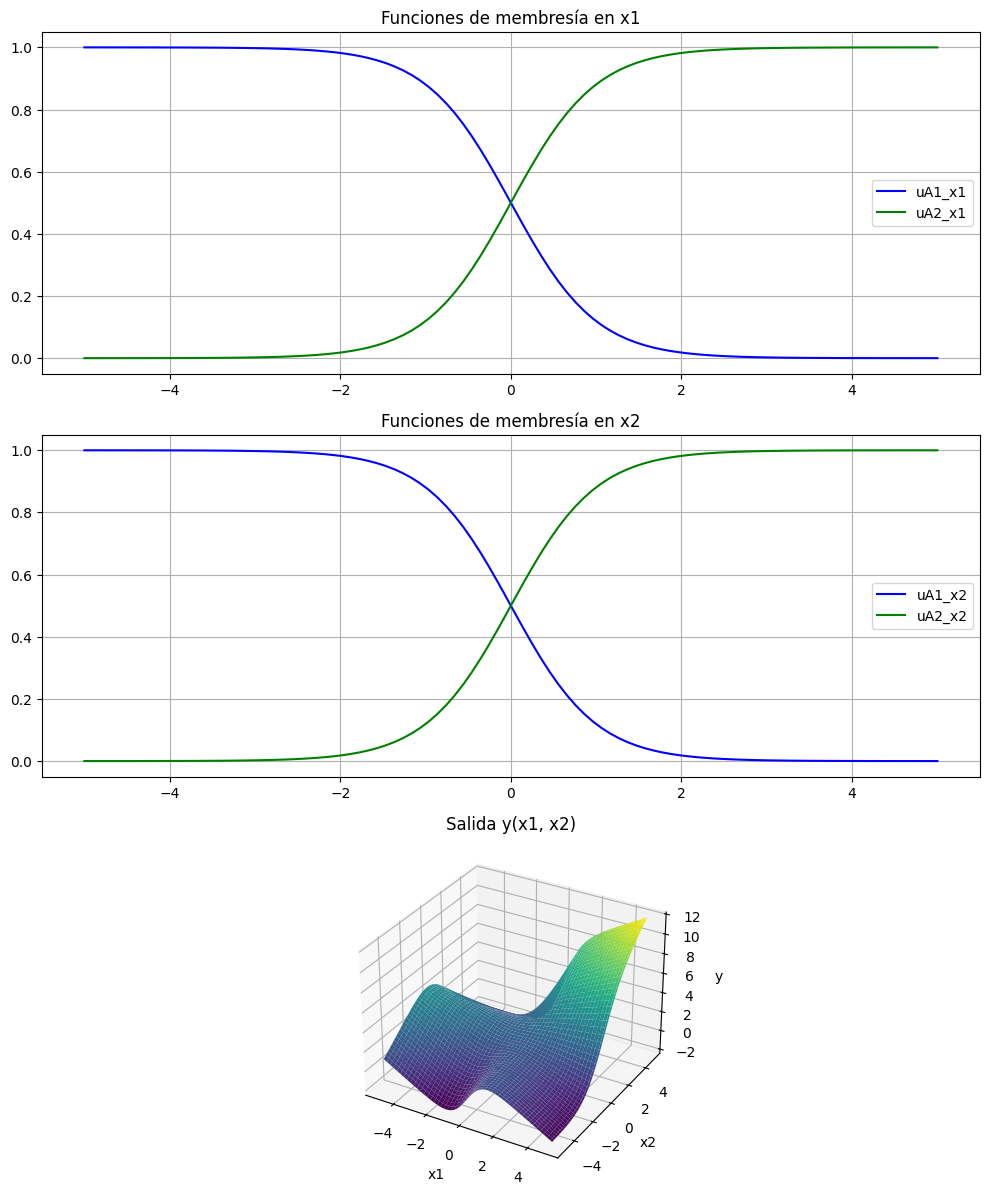

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los rangos de x1 y x2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)

# Parámetros para las funciones sigmoides
centro_x1_A1, sigma_x1_A1 = 0, 2
centro_x1_A2, sigma_x1_A2 = 0, 2
centro_x2_A1, sigma_x2_A1 = 0, 1
centro_x2_A2, sigma_x2_A2 = 0, 1

# Parámetros de las funciones lineales
p1, q1, r1 = -1, 1, 1
p2, q2, r2 = 0, -1, 3
p3, q3, r3 = -1, 0, 3
p4, q4, r4 = 1, 1, 2

# Inicializar los vectores y matrices
uA1_x1 = []
uA2_x1 = []
uA1_x2 = []
uA2_x2 = []
y = np.zeros((len(x1), len(x2)))

# Cálculos principales
for r in range(len(x1)):
    uA1_x1.append(1 / (1 + np.exp(sigma_x1_A1 * (x1[r] - centro_x1_A1))))
    uA2_x1.append(1 / (1 + np.exp(-sigma_x1_A2 * (x1[r] - centro_x1_A2))))
    
    for p in range(len(x2)):
        uA1_x2_val = 1 / (1 + np.exp(sigma_x2_A1 * (x2[p] - centro_x2_A1)))
        uA2_x2_val = 1 / (1 + np.exp(-sigma_x2_A2 * (x2[p] - centro_x2_A2)))
        
        # Calcular los pesos
        w1 = uA1_x1[r] * uA1_x2_val
        w2 = uA1_x1[r] * uA2_x2_val
        w3 = uA2_x1[r] * uA1_x2_val
        w4 = uA2_x1[r] * uA2_x2_val
        
        w_suma = w1 + w2 + w3 + w4
        
        # Normalizar los pesos
        w1_norma = w1 / w_suma
        w2_norma = w2 / w_suma
        w3_norma = w3 / w_suma
        w4_norma = w4 / w_suma
        
        # Calcular las salidas de las funciones lineales
        f1 = x1[r] * p1 + x2[p] * q1 + r1
        f2 = x1[r] * p2 + x2[p] * q2 + r2
        f3 = x1[r] * p3 + x2[p] * q3 + r3
        f4 = x1[r] * p4 + x2[p] * q4 + r4
        
        # Calcular la salida final
        t1 = w1_norma * f1
        t2 = w2_norma * f2
        t3 = w3_norma * f3
        t4 = w4_norma * f4
        y[r, p] = t1 + t2 + t3 + t4

# Convertir listas a arrays para graficar
uA1_x1 = np.array(uA1_x1)
uA2_x1 = np.array(uA2_x1)

# Graficar los resultados
plt.figure(figsize=(10, 12))

# Subplot 1: Funciones de membresía para x1
plt.subplot(3, 1, 1)
plt.plot(x1, uA1_x1, 'b', label='uA1_x1')
plt.plot(x1, uA2_x1, 'g', label='uA2_x1')
plt.grid()
plt.legend()
plt.title('Funciones de membresía en x1')

# Subplot 2: Funciones de membresía para x2
plt.subplot(3, 1, 2)
plt.plot(x2, uA1_x1, 'b', label='uA1_x2')
plt.plot(x2, uA2_x1, 'g', label='uA2_x2')
plt.grid()
plt.legend()
plt.title('Funciones de membresía en x2')

# Subplot 3: Superficie de salida y(x1, x2)
ax = plt.subplot(3, 1, 3, projection='3d')
X1, X2 = np.meshgrid(x1, x2)
ax.plot_surface(X1, X2, y.T, cmap='viridis')
ax.set_title('Salida y(x1, x2)')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.tight_layout()
plt.show()


El programa anterior traza las funciones de membresía de entrada $X$ y $Y$ junto con la superficie de Entrada-Salida resultante. La superficie es compleja, pero sigue siendo obvio que la superficie está compuesta por cuatro planos, cada uno de los cuales está especificado por la salida de una regla difusa.

A diferencia del modelo difuso de Mamdani, el modelo difuso de Sugeno no puede seguir estrictamente la regla composicional de inferencia en su mecanismo de razonamiento difuso. Esto plantea algunas dificultades cuando las entradas a un modelo difuso de Sugeno son difusas. Específicamente, aún podemos emplear la coincidencia de conjuntos difusos para encontrar la intensidad de disparo de cada regla. Sin embargo, la salida global resultante ya sea con el promedio ponderado o con la suma ponderada siempre es certera; esto es contrario a la intuición ya que un modelo difuso debería poder propagar la difusidad de las entradas a las salidas de una manera apropiada.

Sin el proceso que consume tiempo e intrínsecamente intratable matemáticamente de la desdifusificación, el modelo difuso de Sugeno es, por lo tanto, un fuerte candidato para sistemas basados en datos.

## Modelos Difusos de Tsukamoto

En los modelos difusos de Tsukamoto, el consecuente de cada regla difusa si-entonces está representado por un conjunto difuso con una función de membresía monótona. Como resultado, la salida inferida de cada regla se define como un valor certero inducido por la fuerza de activación de la regla; la salida general se toma como el promedio ponderado de la salida de cada regla.

Dado que cada regla infiere una salida certera, el modelo difuso de Tsukamoto agrega la salida de cada regla mediante el método de promedio ponderado y, por lo tanto, evita el proceso que consume tiempo de desdifusificación. Sin embargo, el modelo difuso de Tsukamoto no se utiliza con frecuencia, ya que no es tan transparente como los modelos difusos de Mamdani o Sugeno. A continuación, se presenta un ejemplo con una sola entrada.

#### Modelo difuso de Tsukamoto con una sola entrada

Un ejemplo de un modelo difuso de Tsukamoto con una sola entrada puede expresarse como:

- **Si $X$ es pequeño, entonces $Y = C_1$.**
- **Si $X$ es mediano, entonces $Y = C_2$.**
- **Si $X$ es grande, entonces $Y = C_3$.**

La curva general de entrada-salida, es igual a:

$$
\frac{\sum_{i=1}^3 w_i f_i}{\sum_{i=1}^3 w_i}
$$

Donde $f_i$ es la salida de cada regla inducida por la fuerza de activación $w_i$, y la función de membresía para $C_i$.

Dado que el mecanismo de razonamiento del modelo difuso de Tsukamoto no sigue estrictamente la regla composicional de inferencia, la salida siempre es certera incluso cuando las entradas son difusas.

## Otras Consideraciones

Hay ciertos problemas comunes relacionados con los tres sistemas de inferencia difusa introducidos anteriormente, como la forma de dividir un espacio de entrada y cómo construir un sistema de inferencia difusa para una aplicación en particular. Examinaremos estas cuestiones en esta sección.

### División del Espacio de Entrada

Ahora debería quedar claro que el espíritu de los sistemas de inferencia difusa se asemeja al de "dividir y conquistar": el antecedente de una regla difusa define una región difusa local, mientras que el consecuente describe el comportamiento dentro de la región a través de varios constituyentes. El constituyente consecuente puede ser una función de membresía (MF) consecuente (modelos difusos de Mamdani y Tsukamoto), un valor constante (modelo de Sugeno de orden cero) o una ecuación lineal (modelo de Sugeno de primer orden). Diferentes constituyentes consecuentes resultan en diferentes sistemas de inferencia difusa, pero sus antecedentes son siempre los mismos. Por lo tanto, la siguiente discusión sobre los métodos de división de espacios de entrada para formar los antecedentes de reglas difusas es aplicable a los tres tipos de sistemas de inferencia difusa.

- **División en Cuadrícula**:

Este método de división se elige a menudo al diseñar un controlador difuso, que generalmente solo implica algunas variables de estado como entradas al controlador. Esta estrategia de división solo requiere un pequeño número de funciones de membresía para cada entrada. Sin embargo, encuentra problemas cuando tenemos un número moderadamente grande de entradas; por ejemplo, un modelo difuso con 10 entradas y 2 funciones de membresía en cada entrada resultaría en $2^{10} = 1024$ reglas difusas si-entonces, lo cual es prohibitivamente grande. Este problema, generalmente conocido como la **maldición de la dimensionalidad**, puede aliviarse con las otras estrategias de división.

- **División en Árbol**:

La división en árbol alivia el problema de un aumento exponencial en el número de reglas; sin embargo, se necesitan más funciones de membresía para cada entrada para definir estas regiones difusas, y estas funciones de membresía no suelen tener significados lingüísticos claros como "pequeño", "grande", y así sucesivamente. En otras palabras, la ortogonalidad se mantiene aproximadamente en $X \times Y$, pero no en $X$ o $Y$ por separado. La división en árbol es utilizada por el algoritmo CART (Árbol de Clasificación y Regresión).

- **División Dispersa**

Al cubrir un subconjunto del espacio de entrada total que caracteriza una región de posible ocurrencia de los vectores de entrada, la división dispersa también puede limitar el número de reglas a una cantidad razonable; sin embargo, la división dispersa generalmente está dictada por los pares de datos de entrada y salida deseados y, en general, la ortogonalidad no se mantiene en $X$, $Y$ o $X \times Y$. Esto hace que sea difícil estimar el mapeo general directamente a partir del consecuente de la salida de cada regla.

Nótese que si las funciones de membresía están definidas en ciertas transformaciones de las variables de entrada, podríamos terminar con un estilo de división más flexible.

### Modelado Difuso

A estas alturas, ya se debería haber desarrollado una idea clara tanto de las estructuras como de las operaciones de varios tipos de sistemas de inferencia difusa. En general, diseñamos un sistema de inferencia difusa basado en el comportamiento conocido previamente de un sistema objetivo. Se espera que el sistema difuso sea capaz de reproducir el comportamiento del sistema objetivo; por ejemplo, si el sistema objetivo es un operador humano encargado de un proceso de reacción química, entonces el sistema de inferencia difusa se convierte en un controlador lógico difuso que puede regular y controlar el proceso. De manera similar, si el sistema objetivo es un médico, entonces la inferencia difusa se convierte en un sistema experto difuso para diagnósticos médicos.

Ahora consideremos cómo podríamos construir un sistema de inferencia difusa para una aplicación específica. En términos generales, el método estándar para construir un sistema de inferencia difusa, un proceso que usualmente se denomina modelado difuso, tiene las siguientes características:

- La estructura de reglas de un sistema de inferencia difusa facilita la incorporación de la experiencia humana sobre el sistema objetivo directamente en el proceso de modelado, es decir, el modelado difuso aprovecha el conocimiento del dominio que podría no ser fácilmente empleado en otros enfoques de modelado.

- Cuando los datos de entrada y salida de un sistema objetivo están disponibles, las técnicas convencionales de identificación de sistemas pueden usarse para el modelado difuso. En otras palabras, el uso de datos numéricos también juega un papel importante en el modelado difuso, al igual que en otros métodos de modelado matemático.

A continuación, resumiremos algunas pautas generales relacionadas con el modelado difuso.

Conceptualmente, el modelado difuso puede abordarse en dos etapas, que no son totalmente independientes. La primera etapa es la identificación de la estructura superficial, que incluye las siguientes tareas:

1. Seleccionar las variables de entrada y salida relevantes.
2. Elegir un tipo específico de sistema de inferencia difusa.
3. Determinar el número de términos lingüísticos asociados con cada variable de entrada y salida (para un modelo de Sugeno, determinar el orden de las ecuaciones consecuentes).
4. Diseñar una colección de reglas difusas del tipo si-entonces.

Cabe señalar que para realizar las tareas anteriores, dependemos de nuestro propio conocimiento (sentido común, leyes físicas simples, etc.) del sistema objetivo, información proporcionada por expertos que estén familiarizados con el sistema objetivo o simplemente mediante ensayo y error.

Después de la primera etapa del modelado difuso, obtenemos una base de reglas que puede describir, en mayor o menor medida, el comportamiento del sistema objetivo mediante términos lingüísticos. El significado de estos términos lingüísticos se determina en la segunda etapa, la identificación de la estructura profunda, que establece las funciones de membresía de cada término lingüístico (y los coeficientes del polinomio de salida de cada regla si se utiliza un modelo difuso de Sugeno). Específicamente, la identificación de la estructura profunda incluye las siguientes tareas:

1. Elegir una familia apropiada de funciones de membresía parametrizadas.
2. Entrevistar a expertos familiarizados con los sistemas objetivo para determinar los parámetros de las funciones de membresía utilizadas en la base de reglas.
3. Refinar los parámetros de las funciones de membresía utilizando técnicas de regresión y optimización.

Las tareas 1 y 2 asumen la disponibilidad de expertos, mientras que la tarea 3 supone la disponibilidad de un conjunto de datos deseado de entrada y salida. Cuando se utiliza un sistema de inferencia difusa como controlador para una planta determinada, el objetivo de la tarea 3 debería cambiarse a buscar parámetros que generen el mejor rendimiento de la planta.

# Resumen

Este capítulo presenta tres de los sistemas de inferencia difusa más utilizados: los modelos difusos de Mamdani, Sugeno y Tsukamoto. Discutimos sus fortalezas y debilidades, así como otros temas relacionados, como la partición del espacio de entrada y el modelado difuso.

Los sistemas de inferencia difusa son la herramienta de modelado más importante basada en la teoría de conjuntos difusos. Los sistemas de inferencia difusa convencionales son típicamente construidos por expertos en la materia y han sido utilizados en control automático, análisis de decisiones y sistemas expertos. Las técnicas de optimización y adaptación amplían las aplicaciones de los sistemas de inferencia difusa a campos como el control adaptativo, el procesamiento de señales adaptativo, la regresión no lineal y el reconocimiento de patrones.